In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('learningSet.csv')
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [3]:
cols = []
for col in data.columns:
    cols.append(col.lower())
data.columns = cols
data.columns

Index(['odatedw', 'osource', 'tcode', 'state', 'zip', 'mailcode', 'pvastate',
       'dob', 'noexch', 'recinhse',
       ...
       'target_d', 'hphone_d', 'rfa_2r', 'rfa_2f', 'rfa_2a', 'mdmaud_r',
       'mdmaud_f', 'mdmaud_a', 'cluster2', 'geocode2'],
      dtype='object', length=481)

## Check for Null values and their percentages in the Numerical df

In [4]:
numerical = data.select_dtypes(np.number)
display(numerical.head())

,odatedw,tcode,dob,age,numchld,income,wealth1,hit,mbcraft,mbgarden,mbbooks,mbcolect,magfaml,magfem,magmale,pubgardn,pubculin,pubhlth,pubdoity,pubnewfn,pubphoto,pubopp,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,adate_2,adate_3,adate_4,adate_5,adate_6,adate_7,adate_8,adate_9,adate_10,adate_11,adate_12,adate_13,adate_14,adate_15,adate_16,adate_17,adate_18,adate_19,adate_20,adate_21,adate_22,adate_23,adate_24,cardprom,maxadate,numprom,cardpm12,numprm12,rdate_3,rdate_4,rdate_5,rdate_6,rdate_7,rdate_8,rdate_9,rdate_10,rdate_11,rdate_12,rdate_13,rdate_14,rdate_15,rdate_16,rdate_17,rdate_18,rdate_19,rdate_20,rdate_21,rdate_22,rdate_23,rdate_24,ramnt_3,ramnt_4,ramnt_5,ramnt_6,ramnt_7,ramnt_8,ramnt_9,ramnt_10,ramnt_11,ramnt_12,ramnt_13,ramnt_14,ramnt_15,ramnt_16,ramnt_17,ramnt_18,ramnt_19,ramnt_20,ramnt_21,ramnt_22,ramnt_23,ramnt_24,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [5]:
numerical.isna().sum()

odatedw         0
tcode           0
dob             0
age         23665
numchld     83026
            ...  
target_b        0
target_d        0
hphone_d        0
rfa_2f          0
cluster2      132
Length: 407, dtype: int64

In [6]:
nulls_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_df.columns = ['column', 'nulls_percentage']
nulls_df = nulls_df[nulls_df['nulls_percentage']!= 0]
nulls_df

,column,nulls_percentage
3,age,0.248030
4,numchld,0.870184
5,income,0.223096
6,wealth1,0.468830
8,mbcraft,0.553955
...,...,...
386,ramnt_23,0.917631
387,ramnt_24,0.814090
398,nextdate,0.104526
399,timelag,0.104526


## DROP COLUMNS WITH MORE THAN 50% NaNs

In [7]:
threshold_df = nulls_df[nulls_df['nulls_percentage'] >  0.5]

In [27]:
drop_list = list(threshold_df['column'])           
drop_list[:5]

['numchld', 'mbcraft', 'mbgarden', 'mbbooks', 'mbcolect']

In [9]:
numerical = numerical.drop(drop_list, axis = 1)
numerical.head()

,odatedw,tcode,dob,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,adate_2,adate_3,adate_4,adate_5,adate_6,adate_7,adate_8,adate_9,adate_10,adate_11,adate_12,adate_13,adate_14,adate_16,adate_17,adate_18,adate_19,adate_21,adate_22,adate_24,cardprom,maxadate,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9503.0,9502.0,9501.0,9411.0,9410.0,9409.0,9406.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9509.0,NaN,NaN,9503.0,NaN,NaN,9411.0,9410.0,9409.0,9406.0,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,951

## Cleaning GEOCODE2, WEALTH1, ADI, DMA,and MSA Columns

In [10]:
data['geocode2'].value_counts(dropna = False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: geocode2, dtype: int64

## Replace NaN and Nulls in 'geocode2' with the most common value -> 'A'

In [11]:
data['geocode2'] = data['geocode2'].fillna('A')
data['geocode2'] = data['geocode2'].apply(lambda x: x.replace(' ', 'A'))
data['geocode2'].value_counts(dropna = False)

A    34803
B    28505
D    16580
C    15524
Name: geocode2, dtype: int64

In [12]:
data['wealth1'].value_counts(dropna = False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: wealth1, dtype: int64

In [13]:
data['wealth1'].isna().sum()/len(data)

0.4688299165723389

## Replace NaN in 'msa', 'dma' and 'adi' with the mean. COlumn is not categoricals (Many different values). 
## NaNs are less than 1%

In [14]:
data['msa'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: msa, Length: 299, dtype: int64

In [15]:
data['msa'].isna().sum()/len(data)

0.001383473776883411

In [16]:
data['msa'] = data['msa'].fillna(np.mean(data['msa']))

In [17]:
data['adi'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: adi, Length: 205, dtype: int64

In [18]:
data['adi'].isna().sum()/len(data)

0.001383473776883411

In [19]:
data['adi'] = data['adi'].fillna(np.mean(data['adi']))

In [20]:
data['dma'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: dma, Length: 207, dtype: int64

In [21]:
data['dma'].isna().sum()/len(data)

0.001383473776883411

In [22]:
data['dma'] = data['dma'].fillna(np.mean(data['dma']))

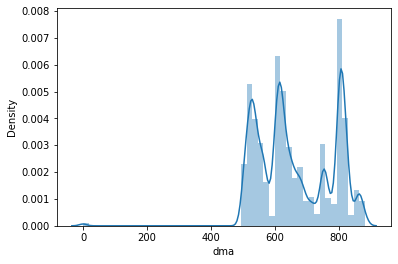

In [23]:
sns.distplot(data['dma'])
plt.show()

## Most of the values are in the range 450 - 900. Removing the outliers

In [24]:
iqr = np.percentile(data['dma'], 75) - np.percentile(data['dma'], 25) 
print(iqr)
lower_limit = np.mean(data['dma']) - 1.5 * iqr
print(lower_limit)

238.0
307.00407220823047


In [25]:
data['dma'] = data['dma'][data['dma'] > lower_limit]

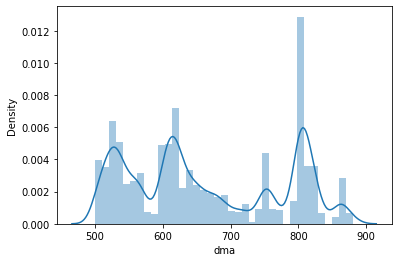

In [26]:
sns.distplot(data['dma'])
plt.show()

## The plot above looks much better (Remember, Bosses just want to see pretty graphs)